# Beschrijving huidige situatie (incl. B-watergang)

Modelleren van de huidige situatie in het sobek model. Hierbij zijn 3 B-watergangen opgenomen. 

In [1]:
# Case: map in 'ModelData' waarin de resultaten van de referentie (huidige situatie) berekening staan
case = 2

## Figuur: Waterstandsniveau in waterlopen vs tijd

In [2]:
import geopandas as gpd
import hkvsobekpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import altair as alt
#alt.renderers.enable('notebook')

In [3]:
## Tabel van id en locaties (x, y) van de rekenpunten in het sobek model ##

# Laden van shapefile rekenpunten
points = gpd.read_file('Shapefiles\Sbk_FGrPt_n.shp')
locations = points.drop(columns=['NAME      ', 'TYPE      ', 'PARENTID  ', 'USERID    ',
       'Z         ', 'COLOR     ', 'DEM_COL   ', 'geometry', 'DEM_ROW   ', 'DEM_Z     '])
locations.columns = ['id', 'x', 'y']

# id van de rekenpunten
calcpnt = locations['id'].values

locations.head()

locations.shape

(634, 3)

In [4]:
## Tabel met model data waterstandsniveau en de locaties van de rekenpunten ##

# Laden van de hisfile met modelresultaten 
path = 'ModelData\{}\calcpnt.his'.format(case)
hisfile = hkvsobekpy.read_his.ReadMetadata(path)

# Selecteer data 'Waterlevel'
parameters = [parameter for parameter in hisfile.GetParameters() if parameter.startswith('Waterlevel')]
values = hisfile.DataFrame()[parameters[0]]

# Selecteer de kolommen die overeen komen met id van rekenpunten in shp file (calcpnt)
cols = [col for col in values.columns if col in calcpnt]
timeseries = values[cols]

# Geef een naam aan de indices and kolommen
timeseries.index.name = 'time'
timeseries.columns.name = 'id'

# Verander format van de dataframe
timeseries = timeseries.reset_index().melt('time')

# Voeg de locatie (x, y) van de rekenpunten toe
data = pd.merge(timeseries, locations, on='id')

data.head()

,time,id,value,x,y
0,2016-05-30 12:00:00,Calc_riv_KD25-TV_105,25.271929,176840.7879,374136.6229
1,2016-05-30 13:00:00,Calc_riv_KD25-TV_105,25.760910,176840.7879,374136.6229
2,2016-05-30 14:00:00,Calc_riv_KD25-TV_105,25.593191,176840.7879,374136.6229
3,2016-05-30 15:00:00,Calc_riv_KD25-TV_105,25.553177,176840.7879,374136.6229
4,2016-05-30 16:00:00,Calc_riv_KD25-TV_105,25.515341,176840.7879,374136.6229


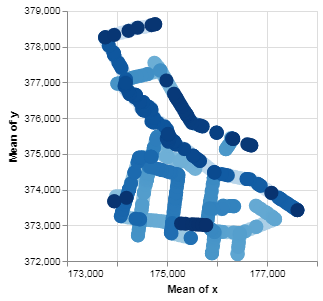

In [24]:
## Figuur waterstandsniveau vs tijd ##

selector = alt.selection_single(empty='all', fields=['id'])

base = alt.Chart(data).properties(
    width=250,
    height=250
).add_selection(selector)

points = base.mark_point(filled=True, size=200).encode(
    x=alt.X('mean(x)', scale=alt.Scale(domain=(173000, 178000))),
    y=alt.Y('mean(y)', scale=alt.Scale(domain=(372000, 379000))),
    tooltip=['id', 'x', 'y'],
    color=alt.condition(selector, 'id:O', alt.value('lightgray'), legend=None),
)#.interactive()

# timeseries = base.mark_line().encode(
#     x='time',
#     y=alt.Y('value', scale=alt.Scale(domain=(22, 27))),
#     color=alt.Color('id:O', legend=None),
#     tooltip=[ alt.Tooltip('time:T', format='%A, %B %e'), 'value'],
# ).transform_filter(
#     selector
# ).interactive(bind_y=False)

# alt.data_transformers.enable('json')

points#  | timeseries

In [8]:
data.reset_index(inplace=True)

In [9]:
grouped = data.groupby([pd.Grouper(key='time', freq='1D'), 'id']).mean()
grouped.reset_index(inplace=True)

In [10]:
selection = grouped[grouped['id'].isin(grouped.id.unique()[0:10])]

In [11]:
for idx, name in enumerate(selection.id.unique()):
    new_name = 'loc{}'.format(str(idx).zfill(2))
    print(name, new_name)
    selection.id = selection.id.str.replace(r'\b{}\b'.format(name), new_name, regex=True)

Calc_riv_KD25-TV_105 loc00


C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Calc_riv_KD25-TV_115 loc01
Calc_riv_KD25-TV_35 loc02
Calc_riv_KD25-TV_5 loc03
Calc_riv_KD25-TV_55 loc04
Calc_riv_KD25-TV_65 loc05
Calc_riv_KD25-TV_75 loc06
Calc_riv_KD25-TV_85 loc07
Calc_riv_KD25-TV_95 loc08
Calc_riv_KD25.1_105 loc09


In [12]:
selection.loc[selection['id'].isin(['loc00','loc01','loc02']), 'group'] = 'grp00'
selection.loc[selection['id'].isin(['loc03','loc04','loc05']), 'group'] = 'grp01'
selection.loc[selection['id'].isin(['loc06','loc07','loc08']), 'group'] = 'grp02'
selection.loc[selection['id'].isin(['loc09']), 'group'] = 'grp03'

C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


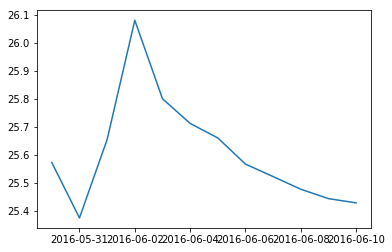

In [29]:
plt.plot(selection[selection['id'] == 'loc00']['time'], selection[selection['id'] == 'loc00']['value'])

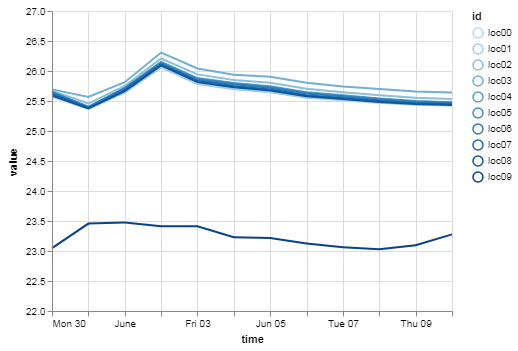

In [20]:
groups = ['grp00','grp01', 'grp02', 'grp03']
groups_dropdown = alt.binding_select(options=groups)
groups_select = alt.selection_single(fields=['group'], bind=groups_dropdown, name="Group Sel")

chart = alt.Chart(selection).mark_line().encode(
    x='time',
    y=alt.Y('value', scale=alt.Scale(domain=(22, 27))),
    color=alt.Color('id:O'),
    tooltip=[ alt.Tooltip('time:T', format='%A, %B %e'), 'value'],
).add_selection(groups_select).transform_filter(groups_select)

chart

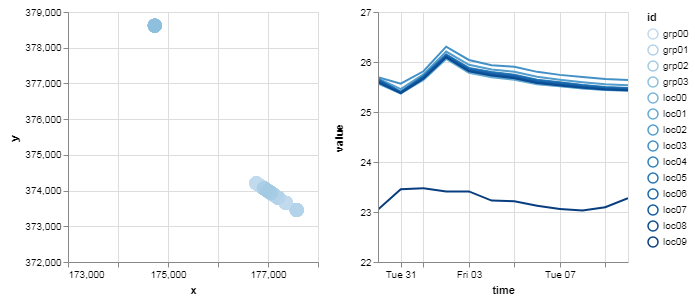

In [31]:
## Figuur waterstandsniveau vs tijd ##

selector = alt.selection_single(empty='all', fields=['group'])

#selector = alt.selection_single(empty='all', fields=['group'])

base = alt.Chart(selection).properties(
    width=250,
    height=250
).add_selection(selector)

points = base.mark_point(filled=True, size=200).encode(
    x=alt.X('x', scale=alt.Scale(domain=(173000, 178000))),
    y=alt.Y('y', scale=alt.Scale(domain=(372000, 379000))),
    tooltip=['id', 'x', 'y'],
    color=alt.condition(selector, 'group:O', alt.value('lightgray'), legend=None),
)

timeseries = base.mark_line().encode(
    x='time',
    y=alt.Y('value', scale=alt.Scale(domain=(22, 27))),
    color=alt.Color('id:O'),
    tooltip=[ alt.Tooltip('time:T', format='%A, %B %e'), 'value'],
).transform_filter(
    selector
).interactive(bind_y=False)

alt.data_transformers.enable('json')

points | timeseries

In [ ]:
grouper = data.groupby('id')['time'].mean()

In [ ]:
grouper.mean()

## Figuur: Inundaties

In [ ]:
## Tabel met waterstandsniveau boven maaiveld ##

# Grid resolutie van het sobek model: 25m x 25m
grid_size = 25

# Laden van het ascii bestand met maximale inundatie waarden
path = f'..\ModelData\{case}\dm1maxd0.asc'
ascii_grid = np.loadtxt(path, skiprows=6)
ascii_grid[ascii_grid == -999.999] = np.nan

In [ ]:
## Figuur inundaties ##

fig, ax = plt.subplots()
map_extent = [0, np.shape(ascii_grid)[1]*grid_size/1000, 0, np.shape(ascii_grid)[0]*grid_size/1000]
img_plot = ax.imshow(ascii_grid, aspect='equal', cmap='Reds', vmax=1.05, extent=map_extent)
cbar = fig.colorbar(img_plot)
cbar.set_label('Waterniveau boven maaiveld [m]')
ax.set_title('Inundatie referentie')
ax.set_xlabel('Afstand [km]')
ax.set_ylabel('Afstand [km]')
fig.tight_layout()
plt.show(fig)

## Berekening: Volume inundaties

In [ ]:
volume = np.round(np.nansum(ascii_grid)*grid_size*grid_size,1)
print('Volume inundaties: {} m^3'.format(volume))